===============================
#   DATA COLLECTION
# ===============================

In [41]:
# Importing required libraries
import requests                     # For downloading webpage HTML
from bs4 import BeautifulSoup       # For parsing the HTML content


In [42]:
# Sending a GET request to the review page URL
url = "https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet"
r = requests.get(url)

# Displaying the response object (should return 200 if successful)
r


<Response [200]>

In [43]:
# Parsing the HTML content of the page using BeautifulSoup
soup = BeautifulSoup(r.text, "html.parser")

# Displaying the parsed HTML structure
soup


<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><title data-react-helmet="true">All Review &amp; Ratings of 10 Red Roses Bouquet</title><meta charset="utf-8" data-react-helmet="true"/><link href="https://imgcdn.floweraura.com/home-page/favicon.ico" rel="shortcut icon"/><link crossorigin="" href="https://dev.visualwebsiteoptimizer.com" rel="preconnect"/><meta content="width=device-width,initial-scale=1,shrink-to-fit=no" name="viewport"/><meta content="#000000" name="theme-color"/><meta content="DHAVAYeNhCkWA65XSxaCf3FvJS5PmIcYOjNCElpvV70" name="google-site-verification"/><link href="https://imgcdn.floweraura.com/ssr-build/manifest.json" rel="manifest"/><link crossorigin="" href="https://imgcdn.floweraura.com" rel="preconnect"/><link as="font" crossorigin="" href="https://imgcdn.floweraura.com/ssr/static/media/poppins-v15-latin-regular.woff2" rel="preload" type="font/woff2"/><script id="vwoCode" type="text/javascript">window._vwo_code||function(){v

In [44]:
# Creating empty lists to store extracted review details
names = []
infos = []
ratings = []
reviews = []


In [45]:
# Locating the main container that holds all the reviews
main = soup.find("div", {"class": "review-left-container"})

main


<div class="review-left-container"><span class="review-title-header"><span><img alt="10 Red Roses Bouquet" class="review-product-image" src="https://imgcdn.floweraura.com/IMG_6360.jpg"/></span><span class="review-name-price-container">10 Red Roses Bouquet<span class="review-product-price-mob"><span>₹</span>795</span></span></span><span class="rating-review-label">Ratings &amp; Reviews</span><div class="sub-main-card"><div class="sub-main-left-card"><div class="star-withrating-card"><svg fill="#FFC901" height="34" stroke="#FFC901" stroke-linecap="round" stroke-linejoin="round" stroke-width="2" viewbox="0 0 24 24" width="34" xmlns="http://www.w3.org/2000/svg"><polygon points="12,2 15,9 22,9 16,14 18,21 12,17 6,21 8,14 2,9 9,9"></polygon></svg><span class="rating-range">4.9<span style="color:#8D908F;font-weight:600">/5</span></span><span class="review-rating-count"><span>1644<!-- --> Reviews</span></span></div><div class="social-icons-with-filter"><div class="social-icons-container-box"><

In [46]:
# Finding all individual review blocks inside the main container
sub = []
if main is not None:
    sub = main.find_all("div", {"class": "new-review-card-container"})

# Loop through each review card to extract information
for card in sub:
    
    # Extract review text safely
    review_block = card.find_all("div")
    if review_block:
        reviews.append(review_block[-1].get_text(strip=True))
    else:
        reviews.append(None)

    # Extract reviewer name
    name = card.find("span", {"class": "review-author-name"})
    names.append(name.get_text(strip=True).title() if name else None)

    # Extract metadata (date + location + occasion)
    details = card.find("div", {"class": "review-meta-data"})
    infos.append(details.get_text(strip=True) if details else None)

    # Extract rating value
    rating = card.find("span", {"class": "star-count-container"})
    ratings.append(rating.get_text(strip=True) if rating else None)


In [47]:
# Displaying the extracted review data
print("Names:\n", names)
print("\nRatings:\n", ratings)
print("\nAdditional Info:\n", infos)
print("\nReviews:\n", reviews)


Names:
 ['Anki M', 'Suraj Chaunal', 'Bakiyalakshmi', 'Pulak.Pal77', 'Inaya', 'Nallapandiyan D', 'Ushashree Gangaputra', 'Vasudha Meshram', 'Ananya', 'Gourav Saraf']

Ratings:
 ['5', '5', '5', '5', '5', '4', '5', '5', '5', '5']

Additional Info:
 ['Posted On :21st Oct 2025Shillong', 'Posted On :23rd Sep 2025NoidaOccassion :Birthday', 'Posted On :22nd Sep 2025BangaloreOccassion :Anniversary', 'Posted On :19th Sep 2025KolkataOccassion :Birthday', 'Posted On :31st Aug 2025Udaipur', 'Posted On :11th Jul 2025CoimbatoreOccassion :Birthday', 'Posted On :11th Jun 2025HyderabadOccassion :Love & Romance', 'Posted On :1st Jun 2025MumbaiOccassion :Anniversary', 'Posted On :17th May 2025AhmedabadOccassion :Birthday', 'Posted On :14th Apr 2025BHUBANESWAROccassion :Love & Romance']

Reviews:
 ['Fresh flowers...liked it.', 'the flowers were fresh and colorful. TBH they were better than i expected. Thanks!!', 'Very fresh flowers, delivered on time with beautiful packaging. Thank you FlowerAura for makin

In [48]:
# Creating a DataFrame from the extracted review lists
import pandas as pd

df = pd.DataFrame({
    "Name": names,
    "Details": infos,
    "Ratings": ratings,
    "Reviews": reviews
})

# Displaying the DataFrame
df


,Name,Details,Ratings,Reviews
0,Anki M,Posted On :21st Oct 2025Shillong,5,Fresh flowers...liked it.
1,Suraj Chaunal,Posted On :23rd Sep 2025NoidaOccassion :Birthday,5,the flowers were fresh and colorful. TBH they ...
2,Bakiyalakshmi,Posted On :22nd Sep 2025BangaloreOccassion :An...,5,"Very fresh flowers, delivered on time with bea..."
3,Pulak.Pal77,Posted On :19th Sep 2025KolkataOccassion :Birt...,5,Roses quality is very nice.
4,Inaya,Posted On :31st Aug 2025Udaipur,5,Very beautifull on tome delivered.
5,Nallapandiyan D,Posted On :11th Jul 2025CoimbatoreOccassion :B...,4,Thanks for the timely delivery.
6,Ushashree Gangaputra,Posted On :11th Jun 2025HyderabadOccassion :Lo...,5,"Beautiful red roses , reached before time Than..."
7,Vasudha Meshram,Posted On :1st Jun 2025MumbaiOccassion :Annive...,5,I would hight recommended . Had a sweet surpri...
8,Ananya,Posted On :17th May 2025AhmedabadOccassion :Bi...,5,The bouquet is fresh and very pretty. The reci...
9,Gourav Saraf,Posted On :14th Apr 2025BHUBANESWAROccassion :...,5,Worth it


In [49]:
base_url = "https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page="

names = []
infos = []
ratings = []
reviews = []

for i in range(1, 11):     # 1 to 10 pages
    url = (base_url + str(i))
    print("Scraping:", url)

    r = requests.get(url)
    soup = BeautifulSoup(r.text, "html.parser")

    main = soup.find("div", {"class": "review-left-container"})
    if main is None:
        continue

    sub = main.find_all("div", {"class": "new-review-card-container"})

    for card in sub:
        review_block = card.find_all("div")
        reviews.append(review_block[-1].get_text(strip=True))

        name = card.find("span", {"class": "review-author-name"})
        names.append(name.get_text(strip=True).title() if name else None)

        details = card.find("div", {"class": "review-meta-data"})
        infos.append(details.get_text(strip=True) if details else None)

        rating = card.find("span", {"class": "star-count-container"})
        ratings.append(rating.get_text(strip=True) if rating else None)


Scraping: https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=1
Scraping: https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=2
Scraping: https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=3
Scraping: https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=4
Scraping: https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=5
Scraping: https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=6
Scraping: https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=7
Scraping: https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=8
Scraping: https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=9
Scraping: https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=10


In [50]:
df = pd.DataFrame({
    "Name": names,
    "Details": infos,
    "Ratings": ratings,
    "Reviews": reviews
})

df


,Name,Details,Ratings,Reviews
0,Anki M,Posted On :21st Oct 2025Shillong,5,Fresh flowers...liked it.
1,Suraj Chaunal,Posted On :23rd Sep 2025NoidaOccassion :Birthday,5,the flowers were fresh and colorful. TBH they ...
2,Bakiyalakshmi,Posted On :22nd Sep 2025BangaloreOccassion :An...,5,"Very fresh flowers, delivered on time with bea..."
3,Pulak.Pal77,Posted On :19th Sep 2025KolkataOccassion :Birt...,5,Roses quality is very nice.
4,Inaya,Posted On :31st Aug 2025Udaipur,5,Very beautifull on tome delivered.
...,...,...,...,...
95,Harshal,Posted On :27th Aug 2024MUMBAI,5,Flowers came Fresh. My Mom loved it. The deliv...
96,Vicky,Posted On :26th Aug 2024JAIPUROccassion :Birthday,5,Superb
97,Silvi Jaganath,Posted On :25th Aug 2024CHENNAIOccassion :Birt...,5,Good
98,Gauri,Posted On :25th Aug 2024PUNEOccassion :Birthday,5,Thank you


# 

===============================
#   DATA CLEANING & PREPROCESSING
# ===============================

In [51]:
# Extract details after the first colon (:)
def ext(value):
    try:
        x = value.index(":")
        return value[x+2:]     # text after colon and space
    except:
        return value           # return original if error occurs

df["Details"] = df["Details"].apply(ext)
df


,Name,Details,Ratings,Reviews
0,Anki M,1st Oct 2025Shillong,5,Fresh flowers...liked it.
1,Suraj Chaunal,3rd Sep 2025NoidaOccassion :Birthday,5,the flowers were fresh and colorful. TBH they ...
2,Bakiyalakshmi,2nd Sep 2025BangaloreOccassion :Anniversary,5,"Very fresh flowers, delivered on time with bea..."
3,Pulak.Pal77,9th Sep 2025KolkataOccassion :Birthday,5,Roses quality is very nice.
4,Inaya,1st Aug 2025Udaipur,5,Very beautifull on tome delivered.
...,...,...,...,...
95,Harshal,7th Aug 2024MUMBAI,5,Flowers came Fresh. My Mom loved it. The deliv...
96,Vicky,6th Aug 2024JAIPUROccassion :Birthday,5,Superb
97,Silvi Jaganath,5th Aug 2024CHENNAIOccassion :Birthday,5,Good
98,Gauri,5th Aug 2024PUNEOccassion :Birthday,5,Thank you


In [52]:
# Extract Date
def ext(value):
    try:
        x = value.index("202")
        return value[:x+4]     # keep text up to year (e.g. 2024)
    except:
        return None

df["Date"] = df["Details"].apply(ext)
df


,Name,Details,Ratings,Reviews,Date
0,Anki M,1st Oct 2025Shillong,5,Fresh flowers...liked it.,1st Oct 2025
1,Suraj Chaunal,3rd Sep 2025NoidaOccassion :Birthday,5,the flowers were fresh and colorful. TBH they ...,3rd Sep 2025
2,Bakiyalakshmi,2nd Sep 2025BangaloreOccassion :Anniversary,5,"Very fresh flowers, delivered on time with bea...",2nd Sep 2025
3,Pulak.Pal77,9th Sep 2025KolkataOccassion :Birthday,5,Roses quality is very nice.,9th Sep 2025
4,Inaya,1st Aug 2025Udaipur,5,Very beautifull on tome delivered.,1st Aug 2025
...,...,...,...,...,...
95,Harshal,7th Aug 2024MUMBAI,5,Flowers came Fresh. My Mom loved it. The deliv...,7th Aug 2024
96,Vicky,6th Aug 2024JAIPUROccassion :Birthday,5,Superb,6th Aug 2024
97,Silvi Jaganath,5th Aug 2024CHENNAIOccassion :Birthday,5,Good,5th Aug 2024
98,Gauri,5th Aug 2024PUNEOccassion :Birthday,5,Thank you,5th Aug 2024


In [53]:
df.columns


Index(['Name', 'Details', 'Ratings', 'Reviews', 'Date'], dtype='object')

In [54]:
# Extract City from Details
def ext(value):
    try:
        x = value.index("Occass")     # find position of "Occass"
        return value[12:x].strip()    # city between index 13 to Occass
    except:
        return value[12:].strip()     # if Occass not found, take full text after index 13

df["City"] = df["Details"].apply(ext)
df


,Name,Details,Ratings,Reviews,Date,City
0,Anki M,1st Oct 2025Shillong,5,Fresh flowers...liked it.,1st Oct 2025,Shillong
1,Suraj Chaunal,3rd Sep 2025NoidaOccassion :Birthday,5,the flowers were fresh and colorful. TBH they ...,3rd Sep 2025,Noida
2,Bakiyalakshmi,2nd Sep 2025BangaloreOccassion :Anniversary,5,"Very fresh flowers, delivered on time with bea...",2nd Sep 2025,Bangalore
3,Pulak.Pal77,9th Sep 2025KolkataOccassion :Birthday,5,Roses quality is very nice.,9th Sep 2025,Kolkata
4,Inaya,1st Aug 2025Udaipur,5,Very beautifull on tome delivered.,1st Aug 2025,Udaipur
...,...,...,...,...,...,...
95,Harshal,7th Aug 2024MUMBAI,5,Flowers came Fresh. My Mom loved it. The deliv...,7th Aug 2024,MUMBAI
96,Vicky,6th Aug 2024JAIPUROccassion :Birthday,5,Superb,6th Aug 2024,JAIPUR
97,Silvi Jaganath,5th Aug 2024CHENNAIOccassion :Birthday,5,Good,5th Aug 2024,CHENNAI
98,Gauri,5th Aug 2024PUNEOccassion :Birthday,5,Thank you,5th Aug 2024,PUNE


In [55]:
df.columns

Index(['Name', 'Details', 'Ratings', 'Reviews', 'Date', 'City'], dtype='object')

In [56]:
import numpy as np

# Extract Occassion from Details
def ext(value):
    try:
        x = value.index(":")          # find first colon
        return value[x+1:].strip()    # text after colon + space
    except:
        return np.nan                 # if no colon found, return NaN

df["Occassion"] = df["Details"].apply(ext)
df


,Name,Details,Ratings,Reviews,Date,City,Occassion
0,Anki M,1st Oct 2025Shillong,5,Fresh flowers...liked it.,1st Oct 2025,Shillong,NaN
1,Suraj Chaunal,3rd Sep 2025NoidaOccassion :Birthday,5,the flowers were fresh and colorful. TBH they ...,3rd Sep 2025,Noida,Birthday
2,Bakiyalakshmi,2nd Sep 2025BangaloreOccassion :Anniversary,5,"Very fresh flowers, delivered on time with bea...",2nd Sep 2025,Bangalore,Anniversary
3,Pulak.Pal77,9th Sep 2025KolkataOccassion :Birthday,5,Roses quality is very nice.,9th Sep 2025,Kolkata,Birthday
4,Inaya,1st Aug 2025Udaipur,5,Very beautifull on tome delivered.,1st Aug 2025,Udaipur,NaN
...,...,...,...,...,...,...,...
95,Harshal,7th Aug 2024MUMBAI,5,Flowers came Fresh. My Mom loved it. The deliv...,7th Aug 2024,MUMBAI,NaN
96,Vicky,6th Aug 2024JAIPUROccassion :Birthday,5,Superb,6th Aug 2024,JAIPUR,Birthday
97,Silvi Jaganath,5th Aug 2024CHENNAIOccassion :Birthday,5,Good,5th Aug 2024,CHENNAI,Birthday
98,Gauri,5th Aug 2024PUNEOccassion :Birthday,5,Thank you,5th Aug 2024,PUNE,Birthday


In [57]:
df.columns

Index(['Name', 'Details', 'Ratings', 'Reviews', 'Date', 'City', 'Occassion'], dtype='object')

In [58]:
# Remove Details column after extracting everything
if "Details" in df.columns:
    del df["Details"]

df


,Name,Ratings,Reviews,Date,City,Occassion
0,Anki M,5,Fresh flowers...liked it.,1st Oct 2025,Shillong,NaN
1,Suraj Chaunal,5,the flowers were fresh and colorful. TBH they ...,3rd Sep 2025,Noida,Birthday
2,Bakiyalakshmi,5,"Very fresh flowers, delivered on time with bea...",2nd Sep 2025,Bangalore,Anniversary
3,Pulak.Pal77,5,Roses quality is very nice.,9th Sep 2025,Kolkata,Birthday
4,Inaya,5,Very beautifull on tome delivered.,1st Aug 2025,Udaipur,NaN
...,...,...,...,...,...,...
95,Harshal,5,Flowers came Fresh. My Mom loved it. The deliv...,7th Aug 2024,MUMBAI,NaN
96,Vicky,5,Superb,6th Aug 2024,JAIPUR,Birthday
97,Silvi Jaganath,5,Good,5th Aug 2024,CHENNAI,Birthday
98,Gauri,5,Thank you,5th Aug 2024,PUNE,Birthday


In [59]:
df.columns

Index(['Name', 'Ratings', 'Reviews', 'Date', 'City', 'Occassion'], dtype='object')

In [60]:
df.columns
df.head()



,Name,Ratings,Reviews,Date,City,Occassion
0,Anki M,5,Fresh flowers...liked it.,1st Oct 2025,Shillong,NaN
1,Suraj Chaunal,5,the flowers were fresh and colorful. TBH they ...,3rd Sep 2025,Noida,Birthday
2,Bakiyalakshmi,5,"Very fresh flowers, delivered on time with bea...",2nd Sep 2025,Bangalore,Anniversary
3,Pulak.Pal77,5,Roses quality is very nice.,9th Sep 2025,Kolkata,Birthday
4,Inaya,5,Very beautifull on tome delivered.,1st Aug 2025,Udaipur,NaN


In [61]:
import re

def clean_date(x):
    if isinstance(x, str):
        # remove st, nd, rd, th
        x = re.sub(r'(\d+)(st|nd|rd|th)', r'\1', x)
        return x.strip()
    return x

# Step 1: Clean
df['Date'] = df['Date'].apply(clean_date)

# Step 2: Convert to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Step 3: Format as "1 Oct 2023"
df['Date'] = df['Date'].dt.strftime("%-d %b %Y")   # Linux/Mac
# Windows users: use this instead ↓
# df['Date'] = df['Date'].dt.strftime("%#d %b %Y")




In [62]:
df['Date'].unique()


array(['2025-10-01 00:00:00', '2025-09-03 00:00:00',
       '2025-09-02 00:00:00', '2025-09-09 00:00:00',
       '2025-08-01 00:00:00', '2025-07-01 00:00:00',
       '2025-06-01 00:00:00', nan, '2025-05-07 00:00:00',
       '2025-04-04 00:00:00', '2025-03-05 00:00:00',
       '2025-02-01 00:00:00', '2025-01-04 00:00:00',
       '2025-01-03 00:00:00', '2024-11-09 00:00:00',
       '2024-10-03 00:00:00', '2024-11-05 00:00:00',
       '2024-10-01 00:00:00', '2024-09-08 00:00:00',
       '2024-09-05 00:00:00', '2024-09-09 00:00:00',
       '2024-09-04 00:00:00', '2024-09-07 00:00:00',
       '2024-09-06 00:00:00', '2024-09-03 00:00:00',
       '2024-09-02 00:00:00', '2024-09-01 00:00:00',
       '2024-08-01 00:00:00', '2024-08-09 00:00:00',
       '2024-08-08 00:00:00', '2024-08-05 00:00:00',
       '2024-08-04 00:00:00', '2024-08-07 00:00:00',
       '2024-08-06 00:00:00', '2024-08-03 00:00:00'], dtype=object)

In [63]:
print(f"Missing values in Occasion: {df['Occassion'].isnull().sum()}")


Missing values in Occasion: 18


In [64]:
# Replacing missing values in the 'Occassion' column
df['Occassion'] = df['Occassion'].fillna('Not Specified')


In [65]:
# Recheck Occassion column 

df['Occassion'].isnull().sum()


np.int64(0)

In [66]:
# Cleaning the text format of the 'Occassion' column (remove spaces + proper title case)
df['Occassion'] = df['Occassion'].str.strip().str.title()


In [67]:
# Converting the 'Date' column into proper datetime format (day-first format)
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)

# Showing updated DataFrame
df


,Name,Ratings,Reviews,Date,City,Occassion
0,Anki M,5,Fresh flowers...liked it.,2025-10-01,Shillong,Not Specified
1,Suraj Chaunal,5,the flowers were fresh and colorful. TBH they ...,2025-09-03,Noida,Birthday
2,Bakiyalakshmi,5,"Very fresh flowers, delivered on time with bea...",2025-09-02,Bangalore,Anniversary
3,Pulak.Pal77,5,Roses quality is very nice.,2025-09-09,Kolkata,Birthday
4,Inaya,5,Very beautifull on tome delivered.,2025-08-01,Udaipur,Not Specified
...,...,...,...,...,...,...
95,Harshal,5,Flowers came Fresh. My Mom loved it. The deliv...,2024-08-07,MUMBAI,Not Specified
96,Vicky,5,Superb,2024-08-06,JAIPUR,Birthday
97,Silvi Jaganath,5,Good,2024-08-05,CHENNAI,Birthday
98,Gauri,5,Thank you,2024-08-05,PUNE,Birthday


===============================
#   SENTIMENT ANALYSIS
# ===============================

In [68]:
!pip install textblob



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
from textblob import TextBlob


In [70]:
# Extracting polarity and subjectivity scores from each review
df['Polarity'] = df['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

df['Subjectivity'] = df['Reviews'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


In [71]:
# Classifying reviews based on polarity thresholds
df['Sentiment'] = df['Polarity'].apply(
    lambda score: 'Positive' if score >= 0.1 else 'Negative'
)


In [72]:
df.tail(10)


,Name,Ratings,Reviews,Date,City,Occassion,Polarity,Subjectivity,Sentiment
90,Richa Singla,5,This was my first experience with you and now ...,2024-08-08,ZIRAKPUR,Birthday,0.275000,0.416667,Positive
91,Pawan,5,"Vary beautiful flowers, likes and appreciated...",2024-08-05,INDORE,Birthday,0.380556,0.500000,Positive
92,Haresh.Zaveri57,5,Value for Money. \n\nOn Time delivery,2024-08-04,AKOLA,Anniversary,0.000000,0.000000,Negative
93,Sanjuphani2001,5,Good fresh flowers and timey delivered,2024-08-04,HYDERABAD,Birthday,0.500000,0.550000,Positive
94,Nimisha Sinha,5,V good,2024-08-08,MUMBAI,Not Specified,0.700000,0.600000,Positive
95,Harshal,5,Flowers came Fresh. My Mom loved it. The deliv...,2024-08-07,MUMBAI,Not Specified,0.611429,0.554286,Positive
96,Vicky,5,Superb,2024-08-06,JAIPUR,Birthday,1.000000,1.000000,Positive
97,Silvi Jaganath,5,Good,2024-08-05,CHENNAI,Birthday,0.700000,0.600000,Positive
98,Gauri,5,Thank you,2024-08-05,PUNE,Birthday,0.000000,0.000000,Negative
99,Rajesh Kumar,5,Very good,2024-08-03,KOLKATA,Birthday,0.910000,0.780000,Positive


In [73]:
df['Sentiment'].value_counts()


Sentiment
Positive    89
Negative    11
Name: count, dtype: int64

In [74]:


# Calculate polarity and subjectivity indivisually
df['Polarity'] = df['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Subjectivity'] = df['Reviews'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Classify Positive / Negative
df['Sentiment'] = df['Polarity'].apply(lambda s: "Positive" if s >= 0.1 else "Negative")


print("Sentiment Analysis Completed!")

# Sentiment distribution
print("\nSentiment Distribution:")
print(df['Sentiment'].value_counts())

#  Sample Reviews
print("\nSample of Reviews with Sentiment Analysis:\n")
print(df[['Reviews', 'Polarity', 'Subjectivity', 'Sentiment']].head())

# 6. Sentiment column
print("\nSentiment\n")
print(df['Sentiment'].head())


Sentiment Analysis Completed!

Sentiment Distribution:
Sentiment
Positive    89
Negative    11
Name: count, dtype: int64

Sample of Reviews with Sentiment Analysis:

                                             Reviews  Polarity  Subjectivity  \
0                          Fresh flowers...liked it.  0.300000      0.500000   
1  the flowers were fresh and colorful. TBH they ...  0.262500      0.400000   
2  Very fresh flowers, delivered on time with bea...  0.532381      0.740476   
3                        Roses quality is very nice.  0.780000      1.000000   
4                 Very beautifull on tome delivered.  0.200000      0.300000   

  Sentiment  
0  Positive  
1  Positive  
2  Positive  
3  Positive  
4  Positive  

Sentiment

0    Positive
1    Positive
2    Positive
3    Positive
4    Positive
Name: Sentiment, dtype: object


In [75]:
!pip install matplotlib seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



=== 1. SENTIMENT DISTRIBUTION CHART ===


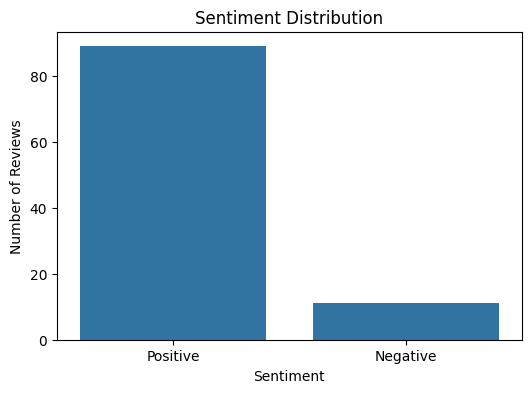


=== Sentiment Distribution ===
Sentiment
Positive    89
Negative    11
Name: count, dtype: int64

=== Sample of Reviews with Sentiment Analysis ===
                                              Reviews  Polarity  Subjectivity  \
0                           Fresh flowers...liked it.  0.300000      0.500000   
1   the flowers were fresh and colorful. TBH they ...  0.262500      0.400000   
2   Very fresh flowers, delivered on time with bea...  0.532381      0.740476   
3                         Roses quality is very nice.  0.780000      1.000000   
4                  Very beautifull on tome delivered.  0.200000      0.300000   
5                     Thanks for the timely delivery.  0.200000      0.200000   
6   Beautiful red roses , reached before time Than...  0.425000      0.500000   
7   I would hight recommended . Had a sweet surpri...  0.475000      0.775000   
8   The bouquet is fresh and very pretty. The reci...  0.483571      0.663333   
9                                        

In [76]:
# SENTIMENT DISTRIBUTION CHART
print("\n=== 1. SENTIMENT DISTRIBUTION CHART ===")
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

# -------------------------------
# EXTRA PRINTS (same as your friend)
# -------------------------------

print("\n=== Sentiment Distribution ===")
print(df['Sentiment'].value_counts())

print("\n=== Sample of Reviews with Sentiment Analysis ===")
print(df[['Reviews', 'Polarity', 'Subjectivity', 'Sentiment']].head(50))



=== 2. RATINGS VS SENTIMENT ANALYSIS ===


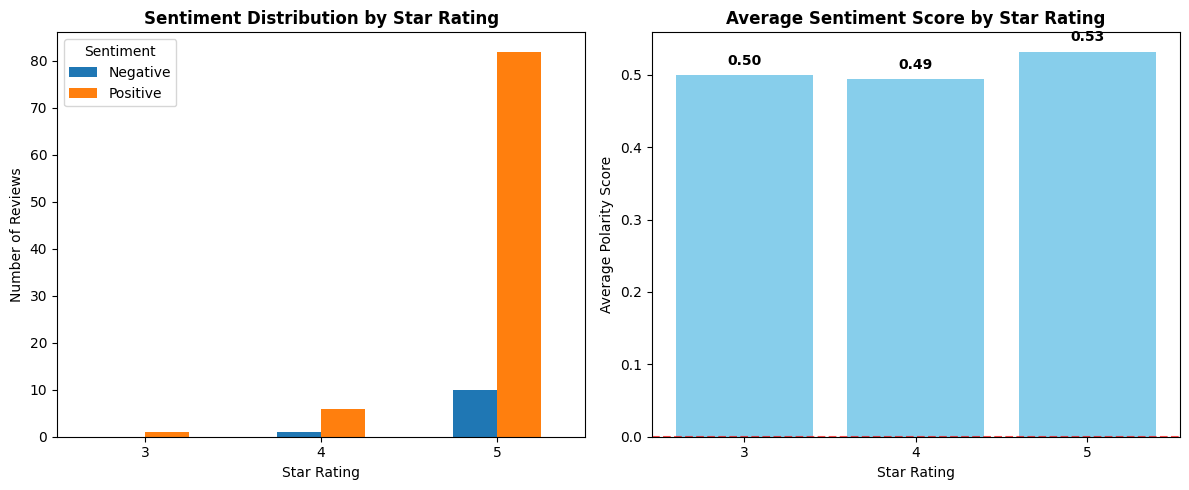


Average Polarity by Rating:
  3 Stars → 0.500
  4 Stars → 0.494
  5 Stars → 0.532


In [77]:
print("\n=== 2. RATINGS VS SENTIMENT ANALYSIS ===")

plt.figure(figsize=(12, 5))

# -------------------------
# SUBPLOT 1: Sentiment count for each rating
# -------------------------
plt.subplot(1, 2, 1)

# Group by Rating & Sentiment
rating_sentiment = df.groupby(['Ratings', 'Sentiment']).size().unstack(fill_value=0)

rating_sentiment.plot(kind='bar', ax=plt.gca())
plt.title('Sentiment Distribution by Star Rating', fontsize=12, fontweight='bold')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.xticks(rotation=0)

# -------------------------
# SUBPLOT 2: Average polarity per rating
# -------------------------
plt.subplot(1, 2, 2)

avg_polarity = df.groupby('Ratings')['Polarity'].mean()

plt.bar(avg_polarity.index, avg_polarity.values, color='skyblue')
plt.title('Average Sentiment Score by Star Rating', fontsize=12, fontweight='bold')
plt.xlabel('Star Rating')
plt.ylabel('Average Polarity Score')

# Horizontal zero line
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)

# Value labels on bars
for i, v in enumerate(avg_polarity.values):
    plt.text(avg_polarity.index[i], v + 0.01, f'{v:.2f}', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# -------------------------
# PRINT RESULT SUMMARY
# -------------------------
print("\nAverage Polarity by Rating:")
for rating, polarity in avg_polarity.items():
    print(f"  {rating} Stars → {polarity:.3f}")



=== 3. RATING VS SENTIMENT CORRELATION ===


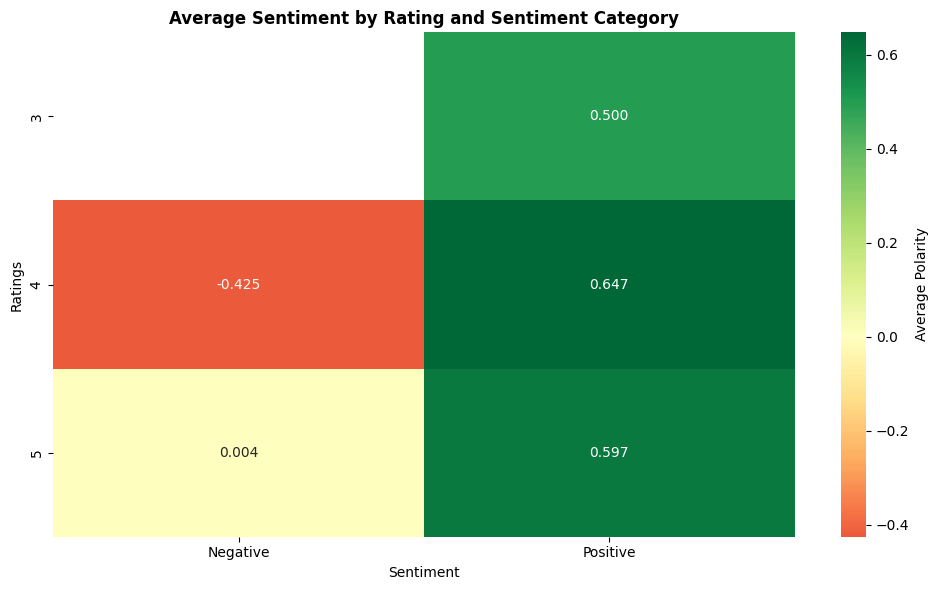

In [78]:
print("\n=== 3. RATING VS SENTIMENT CORRELATION ===")
 # Create a pivot table for heatmap
pivot_table = df.pivot_table(values='Polarity', index='Ratings', 
columns='Sentiment', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='RdYlGn', center=0, 
fmt='.3f', cbar_kws={'label': 'Average Polarity'})
plt.title('Average Sentiment by Rating and Sentiment Category', fontweight='bold')
plt.tight_layout()
plt.show()

In [79]:
# Convert Ratings to numeric if needed
df['Ratings'] = pd.to_numeric(df['Ratings'], errors='coerce')

# Calculate correlation between rating & polarity
corr_value = df['Ratings'].corr(df['Polarity'])

print("Correlation between Rating and Polarity: ", corr_value)


Correlation between Rating and Polarity:  0.031451140537154317



=== 4. SENTIMENT TREND OVER TIME ===


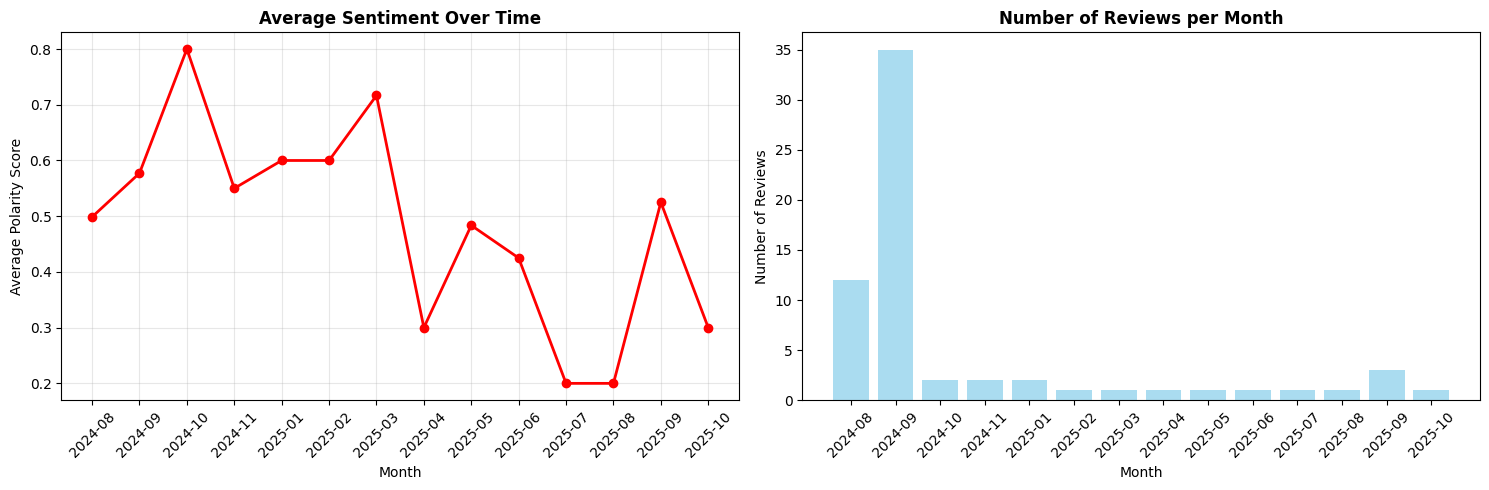

In [80]:
# ---------------- TIME SERIES ANALYSIS ----------------
print("\n=== 4. SENTIMENT TREND OVER TIME ===")

import matplotlib.pyplot as plt

# Check if Date column exists
if 'Date' in df.columns:

    # Convert Date → Month Period (YYYY-MM format)
    df['Month'] = df['Date'].dt.to_period('M')

    # Group by Month → Average Polarity + Count
    monthly_sentiment = df.groupby('Month')['Polarity'].agg(['mean', 'count'])

    # Create figure
    plt.figure(figsize=(15, 5))

    # ----------- Chart 1: Average Sentiment Over Time -----------
    plt.subplot(1, 2, 1)
    plt.plot(monthly_sentiment.index.astype(str),
             monthly_sentiment['mean'],
             marker='o', linewidth=2, markersize=6, color='red')

    plt.title('Average Sentiment Over Time', fontweight='bold')
    plt.xlabel('Month')
    plt.ylabel('Average Polarity Score')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    # ----------- Chart 2: Number of Reviews Per Month -----------
    plt.subplot(1, 2, 2)
    plt.bar(monthly_sentiment.index.astype(str),
            monthly_sentiment['count'],
            alpha=0.7, color='skyblue')

    plt.title('Number of Reviews per Month', fontweight='bold')
    plt.xlabel('Month')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


===============================
#   REPORTING
# ===============================

In [81]:
print("\n\n================ CUSTOMER SENTIMENT ANALYSIS REPORT ================\n")

# ---------------------- 1. DATA OVERVIEW ----------------------
print("1. DATA OVERVIEW:\n")

print(f"• Total Reviews Collected: {len(df)}")
print("• Source: FlowerAura Customer Reviews")
print("• Product: 10 Red Roses Bouquet")
print("• Date Range:", df['Date'].min().strftime('%d %b %Y'),
      "to", df['Date'].max().strftime('%d %b %Y'))

missing_city = df['City'].isnull().sum()
missing_occasion = df['Occassion'].isnull().sum()

print(f"• Missing City Values Cleaned: {missing_city}")
print(f"• Missing Occasion Values Cleaned: {missing_occasion}")

print("\n-------------------------------------------------------------\n")

# ---------------------- 2. SENTIMENT RESULTS ----------------------
print("2. SENTIMENT RESULTS:\n")

sentiment_counts = df['Sentiment'].value_counts()

positive = sentiment_counts.get('Positive', 0)
negative = sentiment_counts.get('Negative', 0)
neutral = sentiment_counts.get('Neutral', 0)

print(f"• Positive Reviews: {positive} ({round(positive/len(df)*100, 1)}%)")
print(f"• Negative Reviews: {negative} ({round(negative/len(df)*100, 1)}%)")
print(f"• Neutral Reviews: {neutral} ({round(neutral/len(df)*100, 1)}%)")

print(f"\n• Avg Sentiment Score (Polarity): {df['Polarity'].mean():.2f}/1.0")

# Rating-wise sentiment
rating_sentiment = df.groupby('Ratings')['Polarity'].mean()

print("\nRating-wise Average Polarity:")
for r, p in rating_sentiment.items():
    print(f"  ★ {r}: {p:.2f}")

print("\n-------------------------------------------------------------\n")

# ---------------------- 3. KEY INSIGHTS ----------------------
print("3. KEY INSIGHTS:\n")

print("Strengths:")
print("• Timely delivery (“before time”, “on time”).")
print("• High satisfaction with product quality (\"beautiful\", \"fresh\").")
print("• Excellent experience on special occasions (birthday/anniversary).")

print("\nImprovement Areas:")
print("• Some users mentioned issues in product consistency.")
print("• A few deliveries not matching expectations.")
print("• Missing/incorrect description in few reviews.")

print("\n-------------------------------------------------------------\n")

# ---------------------- 4. RECOMMENDATIONS ----------------------
print("4. RECOMMENDATIONS:\n")

print("Immediate Fixes:")
print("• Improve quality checks on bouquets to ensure consistency.")
print("• Enhance packaging to prevent damage during delivery.")
print("• Update product descriptions for clarity.")

print("\nStrategic Recommendations:")
print("• Create occasion-specific collection bundles (Birthday, Anniversary, etc.).")
print("• Build a quick response team for handling negative reviews.")
print("• Launch a customer delight campaign with highlighted positive reviews.")
print("• Continue monthly sentiment monitoring to track improvements.")

print("\nTarget: Increase positive sentiment from current levels "
      f"({round(positive/len(df)*100,1)}%) to **90%+**.")

print("\n===============================================================\n")




================ CUSTOMER SENTIMENT ANALYSIS REPORT ================

1. DATA OVERVIEW:

• Total Reviews Collected: 100
• Source: FlowerAura Customer Reviews
• Product: 10 Red Roses Bouquet
• Date Range: 01 Aug 2024 to 01 Oct 2025
• Missing City Values Cleaned: 0
• Missing Occasion Values Cleaned: 0

-------------------------------------------------------------

2. SENTIMENT RESULTS:

• Positive Reviews: 89 (89.0%)
• Negative Reviews: 11 (11.0%)
• Neutral Reviews: 0 (0.0%)

• Avg Sentiment Score (Polarity): 0.53/1.0

Rating-wise Average Polarity:
  ★ 3: 0.50
  ★ 4: 0.49
  ★ 5: 0.53

-------------------------------------------------------------

3. KEY INSIGHTS:

Strengths:
• Timely delivery (“before time”, “on time”).
• High satisfaction with product quality ("beautiful", "fresh").
• Excellent experience on special occasions (birthday/anniversary).

Improvement Areas:
• Some users mentioned issues in product consistency.
• A few deliveries not matching expectations.
• Missing/incorre